In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import matplotlib.pyplot as plt


fiber_bend_data= pd.read_csv('./data/FiberBend/Raw25-15-1.csv')

print fiber_bend_data.head()

df = fiber_bend_data[1:]
print df.head()

      Time Extension      Load
0    (sec)      (mm)       (N)
1  0.00000   0.00000  -0.04164
2  0.10000  -0.01620   0.02158
3  0.20000  -0.05052   0.05305
4  0.30000  -0.08526   0.05269
      Time Extension      Load
1  0.00000   0.00000  -0.04164
2  0.10000  -0.01620   0.02158
3  0.20000  -0.05052   0.05305
4  0.30000  -0.08526   0.05269
5  0.40000  -0.11802   0.05204


In [2]:
def makeDataframe(csvPath):
    df = pd.read_csv(csvPath)
    df = df[1:]
    return df

In [3]:
df = makeDataframe('./data/FiberBend/Raw25-15-1.csv')
print df.head()

      Time Extension      Load
1  0.00000   0.00000  -0.04164
2  0.10000  -0.01620   0.02158
3  0.20000  -0.05052   0.05305
4  0.30000  -0.08526   0.05269
5  0.40000  -0.11802   0.05204


In [4]:
def graphDataframe(df):
    
    ext = df['Extension']
    load = df['Load']

    ext = [float(x) for x in ext]
    load = [float(y) for y in load]
    fig = plt.figure()
    
    fig.set_size_inches(10,10)  # OR
    plt.scatter(ext, load)

    fig.suptitle('Extension vs Load', fontsize=20)
    plt.xlabel('Extension (mm)', fontsize=18)
    plt.ylabel('Load (N)', fontsize=16)
    # fig.savefig('time_compressiveLoad_4pointTest.jpg')

    plt.show()


In [5]:
def toFloat(x):
    return float(x)

def seaborn(df):
    ext = df['Extension'].apply(toFloat)
    load = df['Load'].apply(toFloat)
        
    sns.jointplot(ext,load)

    

In [6]:
def opposite(x):
    return -float(x)

def rotateGraph(df):
    """Returns opposites of values so graphs are correct with values"""    
    df['Extension'] = df['Extension'].apply(opposite)
    df['Load'] = df['Load'].apply(opposite)

    return df
        

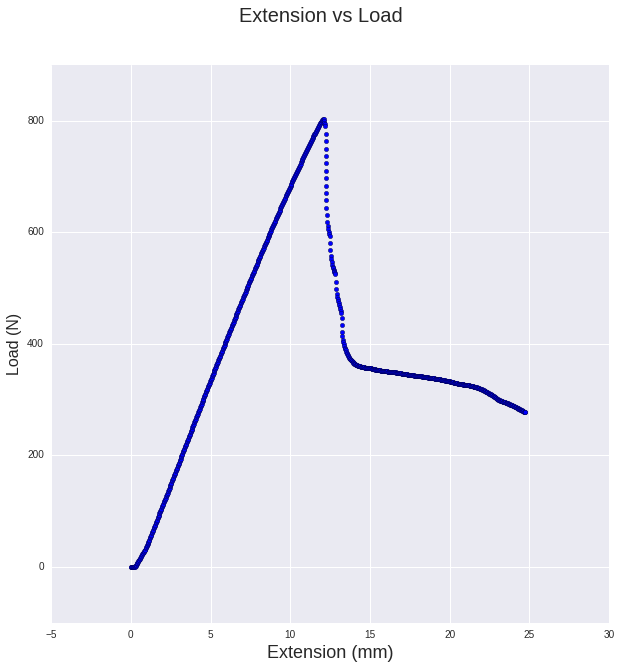

In [7]:
df = makeDataframe('./data/FiberBend/Raw25-15-1.csv')
df = rotateGraph(df)
graphDataframe(df)

In [8]:
# df = makeDataframe('./data/FiberBend/Raw25-15-1.csv')
# df = rotateGraph(df)
# seaborn(df)

In [9]:
def flexuralStress(df):
    """Given Load and Extension, return a dataframe with 
    sress vs strain"""
    
    b = 76.2 # Width of the test beam in mm  (3 in)
    d = 6.35 # Thickness of test beam in mm (1/4 in)
    L = 190 # span of the support in mm (19 cm)
    
    F = df['Load'] # Load in N
    D = df['Extension'] # Extension (deflection of center) in mm
    
    stresses = []
    strains = []
    
    for i in F:
        stress = (3 * i * L) / (2 * b * np.square(d))
        stresses.append(stress)
    
    for j in D:
        strain = (6 * j * d) / (np.square(L))
        strains.append(strain)
    
    return [stresses,strains]
    


In [10]:
def graphStressStrain(data):
    fig = plt.figure()
    fig.set_size_inches(10,10)  # OR
    stress = data[0]
    strain = data[1]
    plt.scatter(strain, stress)

    fig.suptitle('Strain vs Stress', fontsize=20)
    plt.xlabel('Strain (mm)', fontsize=18)
    plt.ylabel('Stress (MPa)', fontsize=16)
    # fig.savefig('time_compressiveLoad_4pointTest.jpg')

    plt.show()


In [11]:
# df = makeDataframe('./data/FiberBend/Raw25-15-1.csv')
# df = rotateGraph(df)
# svs = flexuralStress(df)
# graphStressStrain(svs)

def main(path):
    df = makeDataframe(path)
    df = rotateGraph(df)
    svs = flexuralStress(df)
    return svs

def graph(svs):
    graphStressStrain(svs)
    
    

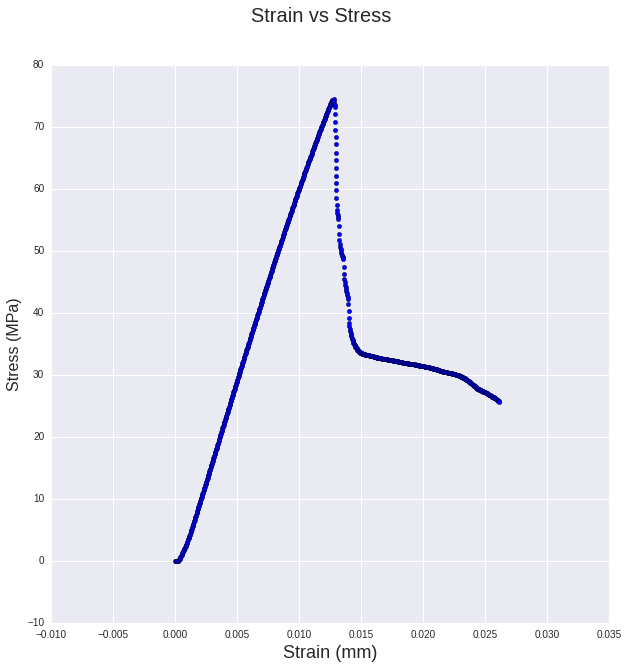

In [12]:
graph(main('./data/FiberBend/Raw25-15-1.csv'))


In [24]:
def getColor(num):
    
    if num == 0:
        return 'r'
    elif num == 1:
        return 'b'
    elif num == 2:
        return 'g'
    elif num == 3:
        return 'y'
    elif num == 4:
        return 'k'
    elif num == 5:
        return 'w'
    

def overlayGraphs(paths):
    
    fig = plt.figure()
    fig.set_size_inches(10,10)  # OR
    
    for i in paths:
        index = paths.index(i)
        plt.scatter(main(i)[1], main(i)[0], color=getColor(index))
    
    fig.suptitle('Strain vs Stress', fontsize=20)
    plt.xlabel('Strain (mm)', fontsize=18)
    plt.ylabel('Stress (MPa)', fontsize=16)
    # fig.savefig('time_compressiveLoad_4pointTest.jpg')

    plt.show()

In [25]:
paths25 = ['./data/FiberBend/Raw25-15-1.csv', './data/FiberBend/Raw25-15-2.csv', './data/FiberBend/Raw25-25-1.csv',
        './data/FiberBend/Raw25-25-2.csv', './data/FiberBend/Raw25-35-1.csv', './data/FiberBend/Raw25-35-2.csv',
        ]

paths50 = ['./data/FiberBend/Raw50-15-1.csv', './data/FiberBend/Raw50-15-2.csv', './data/FiberBend/Raw50-25-1.csv',
        './data/FiberBend/Raw50-25-2.csv', './data/FiberBend/Raw50-35-1.csv', './data/FiberBend/Raw50-35-2.csv',
        ]

paths75 = ['./data/FiberBend/Raw75-15-1.csv', './data/FiberBend/Raw75-15-2.csv', './data/FiberBend/Raw75-25-1.csv',
        './data/FiberBend/Raw75-25-2.csv', './data/FiberBend/Raw75-35-1.csv', './data/FiberBend/Raw75-35-2.csv',
        ]

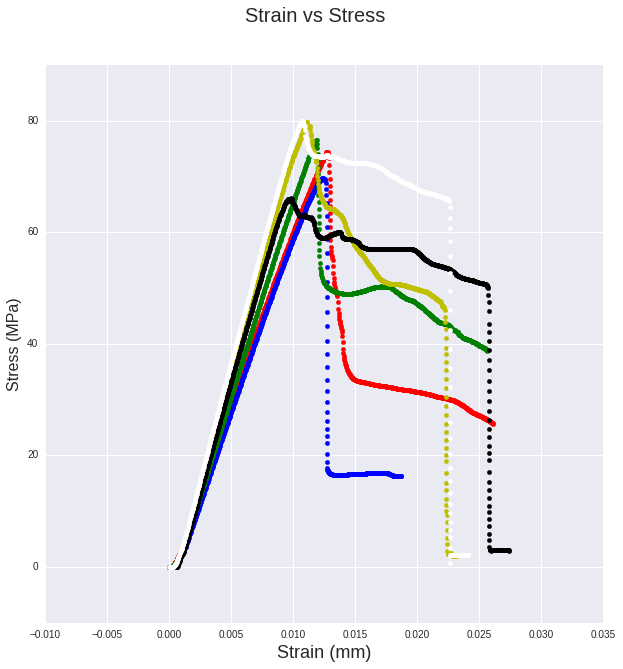

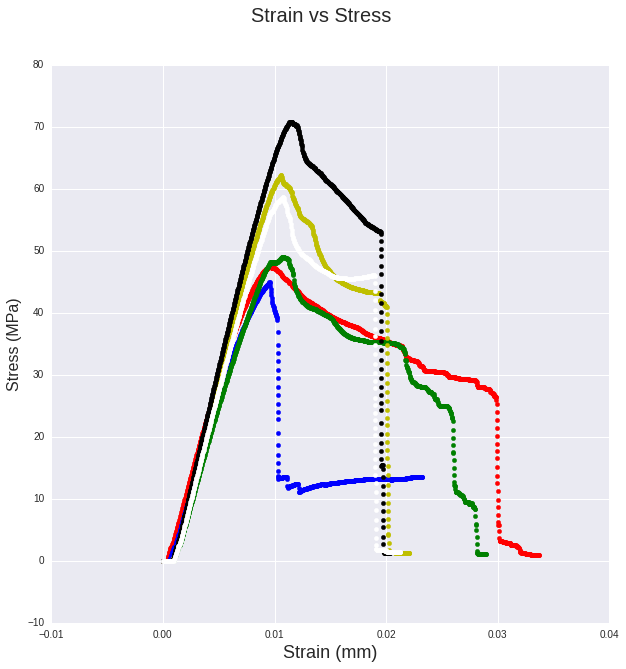

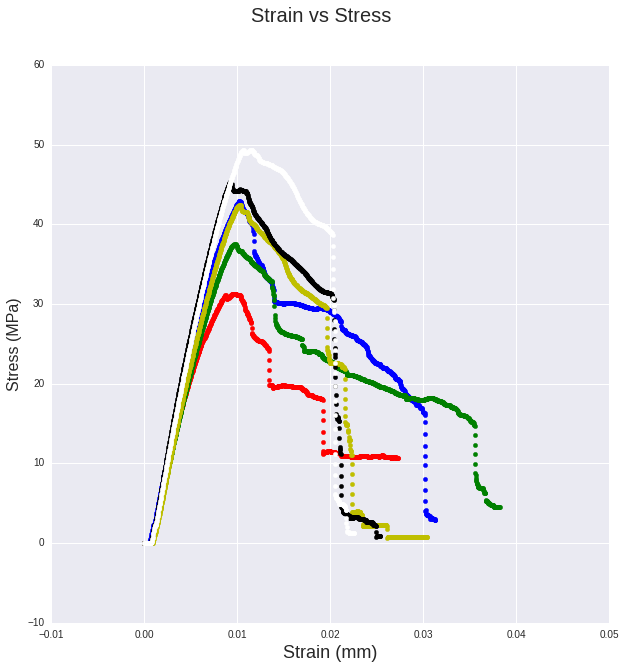

In [26]:
overlayGraphs(paths25)
overlayGraphs(paths50)
overlayGraphs(paths75)

In [39]:
def maxStress(svs):
    maxstress= max(svs[0])
    i = svs[0].index(maxstress)
    
    return svs[1][i], maxstress
    
svs = main('./data/FiberBend/Raw25-15-1.csv')
print 'coordinate:' , maxStress(svs)

coordinate: (0.012759911634349029, 74.458424376691269)


In [38]:
paths = paths25 + paths50 + paths75

In [45]:
dispForce = []

for path in paths:
    dispForce.append([path, maxStress(main(path))])
    
print dispForce

[['./data/FiberBend/Raw25-15-1.csv', (0.012759911634349029, 74.458424376691269)], ['./data/FiberBend/Raw25-15-2.csv', (0.012379840387811635, 69.665737559821565)], ['./data/FiberBend/Raw25-25-1.csv', (0.011841585540166203, 76.53174655325688)], ['./data/FiberBend/Raw25-25-2.csv', (0.011113263407202215, 79.697843079150729)], ['./data/FiberBend/Raw25-35-1.csv', (0.0098151299168975047, 66.155742261090822)], ['./data/FiberBend/Raw25-35-2.csv', (0.010701772853185595, 79.98279813882462)], ['./data/FiberBend/Raw50-15-1.csv', (0.0094986677285318552, 47.451528449513596)], ['./data/FiberBend/Raw50-15-2.csv', (0.0095935799999999991, 44.92167377878063)], ['./data/FiberBend/Raw50-25-1.csv', (0.010765128614958449, 49.057856172405259)], ['./data/FiberBend/Raw50-25-2.csv', (0.010606807811634349, 62.215303973915034)], ['./data/FiberBend/Raw50-35-1.csv', (0.011398359058171742, 70.84629998393855)], ['./data/FiberBend/Raw50-35-2.csv', (0.010765065290858725, 58.639587274450143)], ['./data/FiberBend/Raw75-15-